In [2]:
import geohunter as gh

with gh.osm.Eagle() as api:
    
    state = api.get('(-8.02, -41.01, -3.0, -33.0)',
                 largest_geom=True,
                 name='Rio Grande do Norte')
    
    city = api.get('(-8.02, -41.01, -3.0, -33.0)',
                 largest_geom=True,
                 name='Natal')
    
    poi = api.get(city,
                amenity=['school', 'hospital'],
                highway='primary',
                natural='*')
    
    all_cities = api.get(state, sjoin_op='within',
                        admin_level='8')
    
    biggest_city = api.get(state, sjoin_op='within', largest_geom=True,
                        admin_level='8')
    

Geohunter: [TIMELOG] request_overpass -- {'map_feature_key': 'name', 'map_feature_item': 'Rio Grande do Norte'} -- Completed in 1.6442s
Geohunter: [TIMELOG] get -- {'largest_geom': True, 'name': 'Rio Grande do Norte'} -- Completed in 1.6683s
Geohunter: [TIMELOG] request_overpass -- {'map_feature_key': 'name', 'map_feature_item': 'Natal'} -- Completed in 0.9135s
Geohunter: [TIMELOG] get -- {'largest_geom': True, 'name': 'Natal'} -- Completed in 0.9306s
Geohunter: [TIMELOG] request_overpass -- {'map_feature_key': 'amenity', 'map_feature_item': 'school'} -- Completed in 1.374s
Geohunter: [TIMELOG] request_overpass -- {'map_feature_key': 'amenity', 'map_feature_item': 'hospital'} -- Completed in 0.8368s
Geohunter: [TIMELOG] request_overpass -- {'map_feature_key': 'highway', 'map_feature_item': 'primary'} -- Completed in 0.8591s
Geohunter: [TIMELOG] request_overpass -- {'map_feature_key': 'natural', 'map_feature_item': '*'} -- Completed in 1.0742s
Geohunter: [TIMELOG] get -- {'amenity': ['s

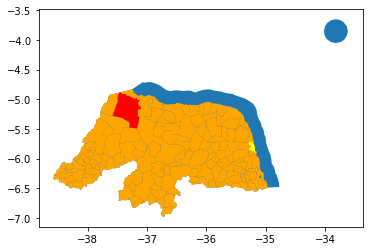

In [13]:
ax = state.plot()
all_cities.plot(ax=ax, color='orange')
biggest_city.plot(ax=ax, color='red')
city.plot(ax=ax, color='yellow')

In [3]:
poi.head()

,type,id,tags,geometry,mf_key,mf_item
0,node,501170977,{'amenity': 'school'},POINT (-35.23427 -5.86902),amenity,school
1,node,501170997,"{'amenity': 'school', 'name': 'Centro de Atenç...",POINT (-35.22261 -5.82361),amenity,school
2,node,501784871,{'amenity': 'school'},POINT (-35.21073 -5.81294),amenity,school
3,node,501784918,"{'amenity': 'school', 'name': 'Escola Boa Ideia'}",POINT (-35.22495 -5.87417),amenity,school
4,node,502442042,{'amenity': 'school'},POINT (-35.23957 -5.84999),amenity,school


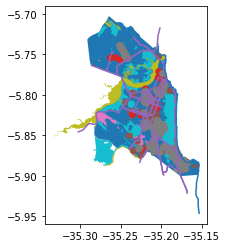

In [5]:
ax = city.plot()
poi.plot(ax=ax, column='mf_item')

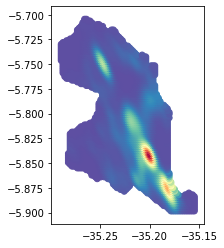

In [16]:
grid = gh.util.kde_interpolation(poi,
    bw=20/110, area=city, resolution=0.2)


ax = city.plot(color='white', edgecolor='black')
grid.plot(ax=ax, column='density', figsize=(7,7), cmap='Spectral_r')